<a href="https://colab.research.google.com/github/saikumar888-dot/Face-Mask-Detection-Using-CNN/blob/main/DL_project_(FACE_MASK_DETECTION_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:01<00:00, 120MB/s]
100% 163M/163M [00:01<00:00, 116MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


In [ ]:
# Importing the Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Set the paths to the folders containing the images
with_mask_folder = '/content/data/with_mask/'
without_mask_folder = '/content/data/without_mask/'


In [ ]:
# Function to load and resize images
def load_and_resize_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize images to 128x128
            images.append(img)
    return images


In [ ]:
# Load and resize images with masks
with_mask_images = load_and_resize_images(with_mask_folder)


In [ ]:
# Load and resize images without masks
without_mask_images = load_and_resize_images(without_mask_folder)


In [ ]:
print('Number of with mask images:', len(with_mask_images))
print('Number of without mask images:', len(without_mask_images))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# Create labels for the images
with_mask_labels = np.ones(len(with_mask_images))  # Label 1 for images with masks
without_mask_labels = np.zeros(len(without_mask_images))  # Label 0 for images without masks


In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [ ]:
# Concatenate the images and labels
X = np.array(with_mask_images + without_mask_images)
Y = np.concatenate((with_mask_labels, without_mask_labels), axis=0)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1. 1. 1. ... 0. 0. 0.]


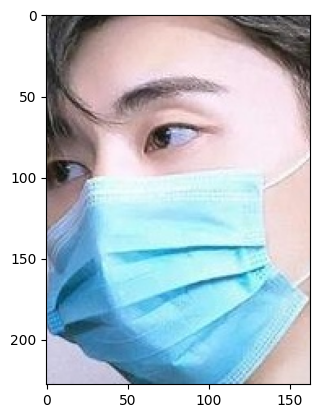

In [ ]:
# displaying with mask image
import matplotlib.image as mpimg # import the module matplotlib.image and alias it as mpimg
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

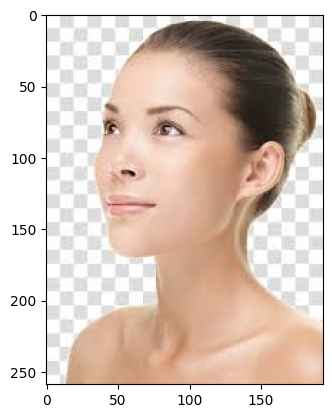

In [ ]:
# displaying without mask image
import matplotlib.image as mpimg
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# **Train Test Split**
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)



In [ ]:
# Print shapes for confirmation
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (6042, 128, 128, 3)
Y_train shape: (6042,)
X_test shape: (1511, 128, 128, 3)
Y_test shape: (1511,)


In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


array([[[ 25,  29,  88],
        [ 34,  37,  95],
        [ 42,  44, 102],
        ...,
        [ 23,  16,  16],
        [ 22,  17,  16],
        [ 22,  17,  16]],

       [[ 26,  31,  92],
        [ 37,  41, 101],
        [ 46,  47, 108],
        ...,
        [ 24,  16,  16],
        [ 21,  13,  13],
        [ 21,  16,  15]],

       [[ 38,  42, 107],
        [ 50,  53, 119],
        [ 57,  58, 123],
        ...,
        [ 28,  20,  20],
        [ 27,  19,  19],
        [ 26,  18,  18]],

       ...,

       [[ 60,  61, 173],
        [ 63,  63, 173],
        [ 64,  64, 172],
        ...,
        [ 92, 105, 141],
        [ 93, 107, 143],
        [ 94, 108, 144]],

       [[ 59,  59, 171],
        [ 62,  63, 173],
        [ 61,  63, 171],
        ...,
        [ 93, 107, 140],
        [ 94, 108, 142],
        [ 93, 109, 144]],

       [[ 61,  63, 175],
        [ 65,  67, 177],
        [ 63,  65, 173],
        ...,
        [ 95, 109, 142],
        [ 96, 111, 144],
        [ 95, 112, 145]]], dtype=uint8)
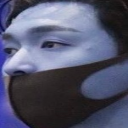

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.09803922, 0.11372549, 0.34509804],
        [0.13333333, 0.14509804, 0.37254902],
        [0.16470588, 0.17254902, 0.4       ],
        ...,
        [0.09019608, 0.0627451 , 0.0627451 ],
        [0.08627451, 0.06666667, 0.0627451 ],
        [0.08627451, 0.06666667, 0.0627451 ]],

       [[0.10196078, 0.12156863, 0.36078431],
        [0.14509804, 0.16078431, 0.39607843],
        [0.18039216, 0.18431373, 0.42352941],
        ...,
        [0.09411765, 0.0627451 , 0.0627451 ],
        [0.08235294, 0.05098039, 0.05098039],
        [0.08235294, 0.0627451 , 0.05882353]],

       [[0.14901961, 0.16470588, 0.41960784],
        [0.19607843, 0.20784314, 0.46666667],
        [0.22352941, 0.22745098, 0.48235294],
        ...,
        [0.10980392, 0.07843137, 0.07843137],
        [0.10588235, 0.0745098 , 0.0745098 ],
        [0.10196078, 0.07058824, 0.07058824]],

       ...,

       [[0.23529412, 0.23921569, 0.67843137],
        [0.24705882, 0.24705882, 0.67843137],
        [0.25098039, 0

In [ ]:
# **Building a Convolutional Neural Networks (CNN)**
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - acc: 0.6971 - loss: 0.6105 - val_acc: 0.8645 - val_loss: 0.3182
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.8802 - loss: 0.2951 - val_acc: 0.9306 - val_loss: 0.2089
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9070 - loss: 0.2348 - val_acc: 0.9041 - val_loss: 0.2415
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9243 - loss: 0.2070 - val_acc: 0.9355 - val_loss: 0.1789
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9348 - loss: 0.1749 - val_acc: 0.9306 - val_loss: 0.2032


In [ ]:
# **Model Evaluation**
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)
h = history


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9432 - loss: 0.1619
Test Accuracy = 0.9377895593643188


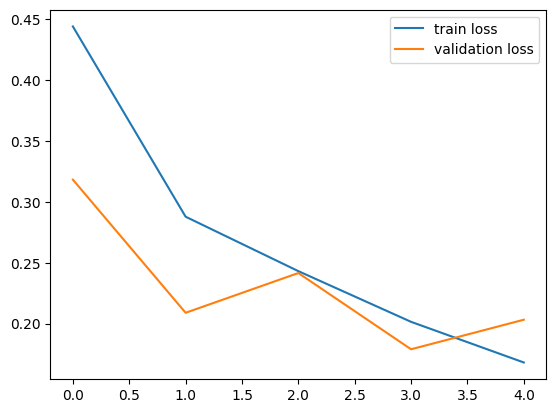

In [ ]:
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

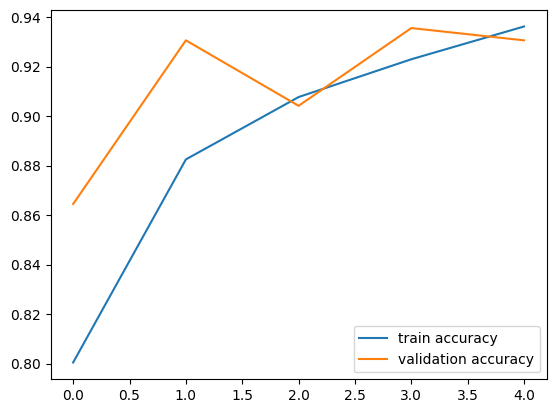

In [ ]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


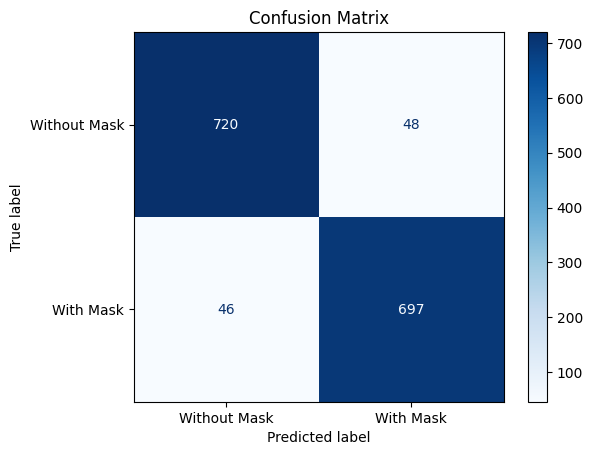

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert probabilities to class labels
# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Without Mask', 'With Mask'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# Predict the labels for the test set
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert probabilities to class labels
# Generate classification report
report = classification_report(Y_test, Y_pred_classes, target_names=['Without Mask', 'With Mask'])
print("Classification Report:\n", report)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Classification Report:
               precision    recall  f1-score   support

Without Mask       0.94      0.94      0.94       768
   With Mask       0.94      0.94      0.94       743

    accuracy                           0.94      1511
   macro avg       0.94      0.94      0.94      1511
weighted avg       0.94      0.94      0.94      1511



Path of the image to be predicted: /content/data/without_mask/without_mask_1232.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


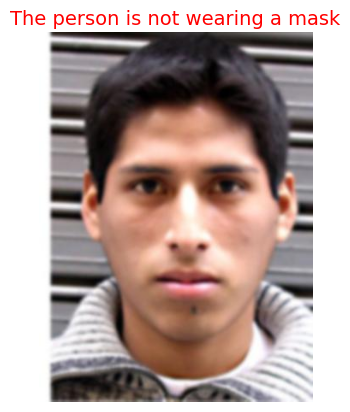

Thank you Wanna try next!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the model (Make sure your model is already loaded)
# model = load_model('your_model_path.h5')

# Get the image path from user
input_image_path = input('Path of the image to be predicted: ')
# Read and preprocess the image
input_image = cv2.imread(input_image_path)
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
# Make prediction
input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)
# Display the result
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.axis('off')  # Hide axis

if input_pred_label == 1:
    plt.title('The person is wearing a mask', fontsize=14, color='green')
else:
    plt.title('The person is not wearing a mask', fontsize=14, color='red')

plt.show()
print("Thank you Wanna try next!")
